In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
# import cvxpy as cp
import warnings
warnings.filterwarnings("ignore")

In [2]:
import McExperiment
from McExperiment import *
import importlib
importlib.reload(McExperiment)

<module 'McExperiment' from '/Users/silsilviaaa/Desktop/FIN535/final/FIN535-Final-23F/McExperiment.py'>

In [3]:
data = pd.read_csv('data.csv')
data['month'] = data['month'].apply(lambda x: datetime.strptime(x, '%Y-%m')) #assume each date per month is the last day
data.set_index(['month'],inplace=True)

In [23]:
arr = [[0.3689973,0.827529082,0.524823816,0.75,-0.196526382],
       [0.49018506,0.50981494,0.342315271,0.75,0],
       [0.176134292,0.823865714,0.618647147,0.75,0]]
opt_ratios = pd.DataFrame(arr, index = ['uti','sharpe','mdd'], 
                  columns=['x1','x2','x3','x4','x5'])
opt_ratios

,x1,x2,x3,x4,x5
uti,0.368997,0.827529,0.524824,0.75,-0.196526
sharpe,0.490185,0.509815,0.342315,0.75,0.000000
mdd,0.176134,0.823866,0.618647,0.75,0.000000


### Max log v-utility

In [5]:
SAVE = 40000
CAP = 50000
g = 0.11
MC = 500
path_length = 120
train_df = pd.read_csv('train.csv')

In [6]:
ratio = (opt_ratios.iloc[0,:]).to_list()

# Get the analysis for end of 5Y/7Y/10Y 
Simu_table, Simu_cap_table = Experiments(MC,path_length,train_df,CAP,SAVE,g,ratio,years=[60,84,120],tax=0)
Summary_table1, cap_table1 = GetSummary(Simu_table, Simu_cap_table, path_length)
Summary_table1 = Summary_table1.fillna(0)
Summary_table1.round(2)

,Expected Cap,Std Cap,Exp Cap < 500k,Prob >= 500k,Expected Annual_sharpe,Expected Annual_sortino,Expected MDD,ret VaR,ret CVaR,GaR,CGaR
5Y,347936.85,105468.83,330368.17,0.07,1.45,2.88,0.13,0.29,0.23,-365513.32,-378638.84
7Y,640200.76,203605.16,407500.29,0.74,1.47,2.82,0.14,0.64,0.55,-231829.51,-246966.95
10Y,1403136.66,494344.79,441353.14,1.00,1.46,2.75,1.61,1.50,1.21,95343.70,4242.59


### Max Sharpe ratio

In [8]:
ratio = (opt_ratios.iloc[1,:]).to_list()

# Get the analysis for end of 5Y/7Y/10Y 
Simu_table, Simu_cap_table = Experiments(MC,path_length,train_df,CAP,SAVE,g,ratio,years=[60,84,120],tax=0)
Summary_table2, cap_table2 = GetSummary(Simu_table, Simu_cap_table, path_length)
Summary_table2 = Summary_table2.fillna(0)
Summary_table2.round(2)

,Expected Cap,Std Cap,Exp Cap < 500k,Prob >= 500k,Expected Annual_sharpe,Expected Annual_sortino,Expected MDD,ret VaR,ret CVaR,GaR,CGaR
5Y,314531.63,80648.01,311360.46,0.01,1.74,3.26,0.10,0.34,0.31,-356355.88,-370493.74
7Y,549857.46,146477.06,409752.62,0.61,1.71,3.06,0.11,0.79,0.69,-223835.81,-264535.17
10Y,1165449.51,332460.31,489960.66,1.00,1.70,2.92,1.35,1.52,1.35,50013.53,17420.18


### Min max drawdown

In [9]:
ratio = (opt_ratios.iloc[2,:]).to_list()

# Get the analysis for end of 5Y/7Y/10Y 
Simu_table, Simu_cap_table = Experiments(MC,path_length,train_df,CAP,SAVE,g,ratio,years=[60,84,120],tax=0)
Summary_table3, cap_table3 = GetSummary(Simu_table, Simu_cap_table, path_length)
Summary_table3 = Summary_table3.fillna(0)
Summary_table3.round(2)

,Expected Cap,Std Cap,Exp Cap < 500k,Prob >= 500k,Expected Annual_sharpe,Expected Annual_sortino,Expected MDD,ret VaR,ret CVaR,GaR,CGaR
5Y,329649.78,107822.24,312435.68,0.07,1.32,2.68,0.13,0.19,0.08,-380542.10,-387134.11
7Y,586003.86,199939.11,395999.40,0.62,1.31,2.62,0.15,0.36,0.22,-256215.55,-312185.95
10Y,1243938.55,444662.08,431558.13,0.99,1.31,2.57,1.44,1.02,0.79,-31433.84,-84580.99


## Financial Diamond

In [37]:
def get_loc(year_pts,cap_pts):
    x_coor = [year_pts[0],year_pts[2],year_pts[1],year_pts[1]]
    y_coor = [cap_pts[1],cap_pts[1],cap_pts[2],cap_pts[0]]
    return x_coor, y_coor

year_pts = [4,5,6]
cap_pts1 = [cap_table1.iloc[3,0],cap_table1.iloc[4,0], cap_table1.iloc[5,0]]
cap_pts2 = [cap_table2.iloc[3,0],cap_table1.iloc[4,0], cap_table2.iloc[5,0]]
cap_pts3 = [cap_table3.iloc[3,0],cap_table1.iloc[4,0], cap_table3.iloc[5,0]]
cap_pts_lst = [cap_pts1,cap_pts2,cap_pts3]

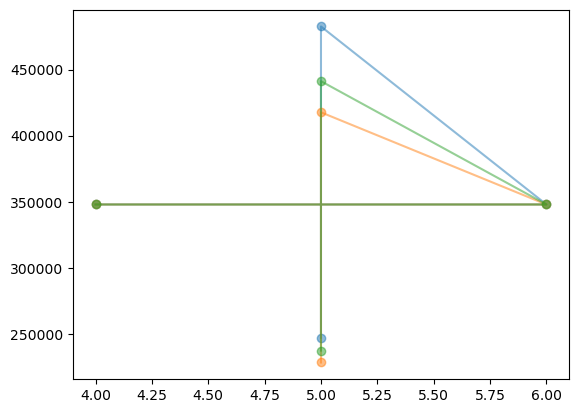

In [42]:
for i in range(len(cap_pts_lst)):
    x_coor, y_coor = get_loc(year_pts,cap_pts_lst[i])
    plt.plot(x_coor, y_coor, '-o',alpha = 0.5)